# M.Usman Akram
## Heart Disease Analysis Using ML
### Import Required Liberaries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### About Dataset :
- This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


### Import DataSet:

In [2]:
df=pd.read_csv("heart.csv")

### Display Top 5 Rows of The Dataset:

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- age
- sex
- chest pain type (4 values)
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target : 0=less chance of heart attack, 1=more chance of heart attack

### Check The Last 5 Rows of The Dataset :

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


###  Find Shape of Our Dataset (Number of Rows And Number of Columns) :

In [5]:
print(df.shape)
print("Number of Rows : ",df.shape[0])
print("Number of Columns : ",df.shape[1])


(1025, 14)
Number of Rows :  1025
Number of Columns :  14


### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


 ### Check Null Values In The Dataset:

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check For Duplicate Data and Drop Them:

In [8]:
df.duplicated().sum()

723

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(302, 14)

### Get Overall Statistics About The Dataset:

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###  Draw Correlation Matrix :

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

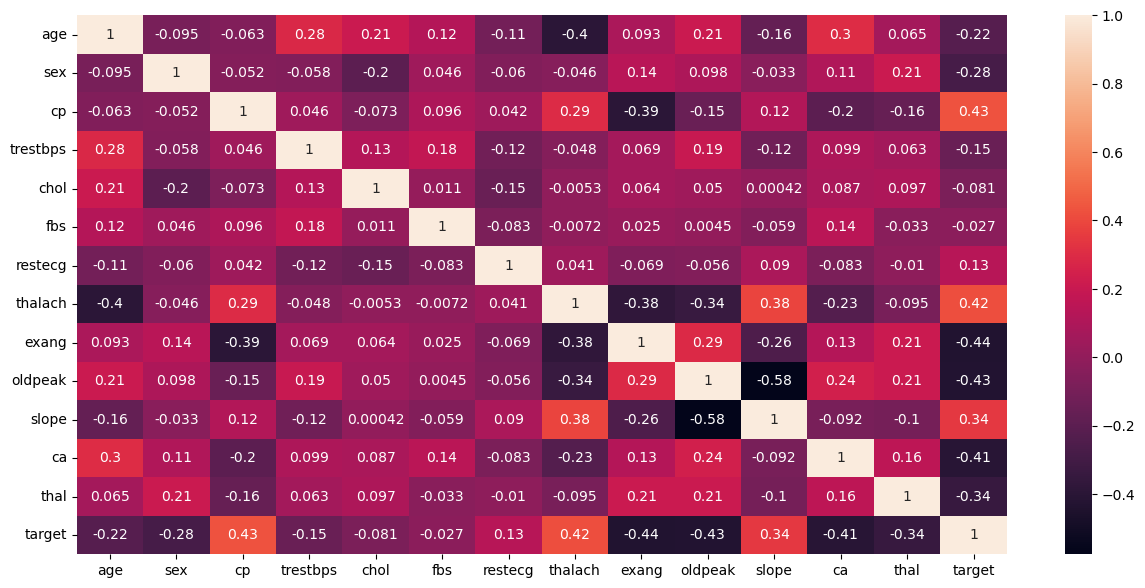

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

### How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [14]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

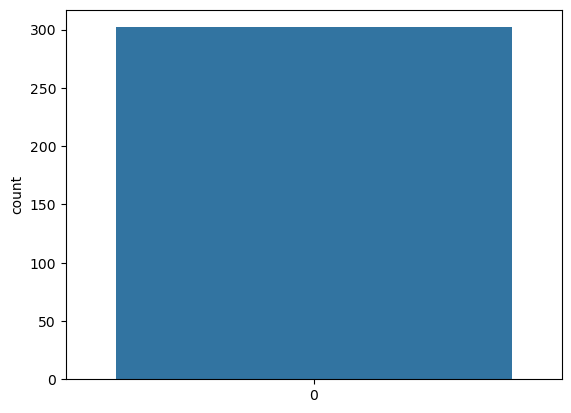

In [15]:
sns.countplot(df["target"])
plt.show()

### Find Count of  Male & Female in this Dataset:

In [16]:
df["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

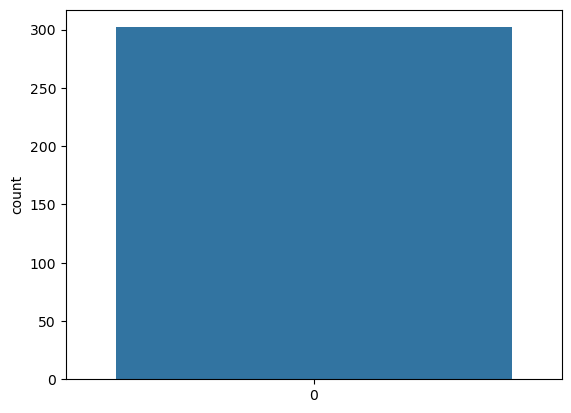

In [17]:
sns.countplot(df["sex"])
plt.show()

###  Find Gender Distribution According to The Target Variable:

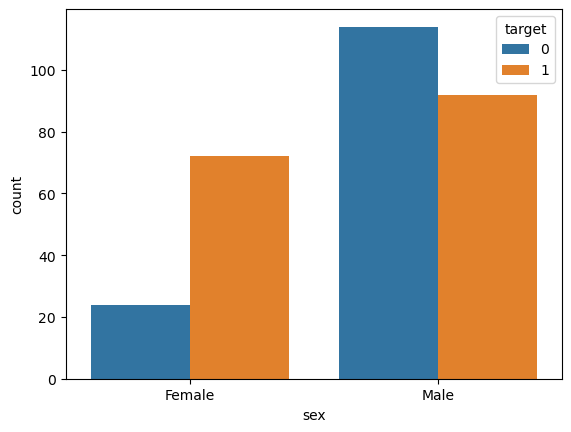

In [18]:
sns.countplot(x="sex",hue="target",data=df)
plt.xticks([1,0],["Male","Female"])
plt.show()

### Check Age Distribution In the Dataset:

<Axes: xlabel='age', ylabel='Density'>

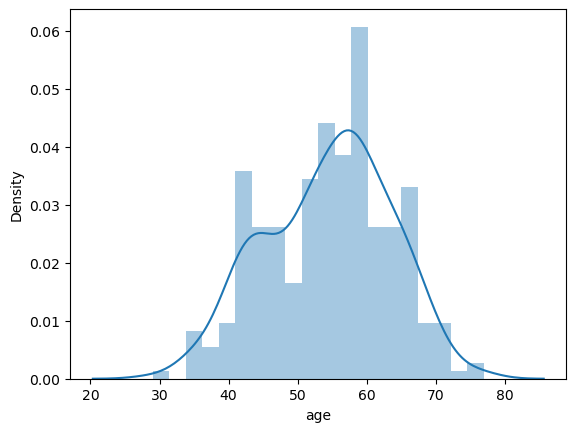

In [19]:
sns.distplot(df["age"],bins=20)

### Check Chest Pain Type:
- chest pain type (4 values)
     - Value 0: typical angina
     - Value 1: atypical angina
     - Value 2: non-anginal pain
     - Value 3: asymptomatic

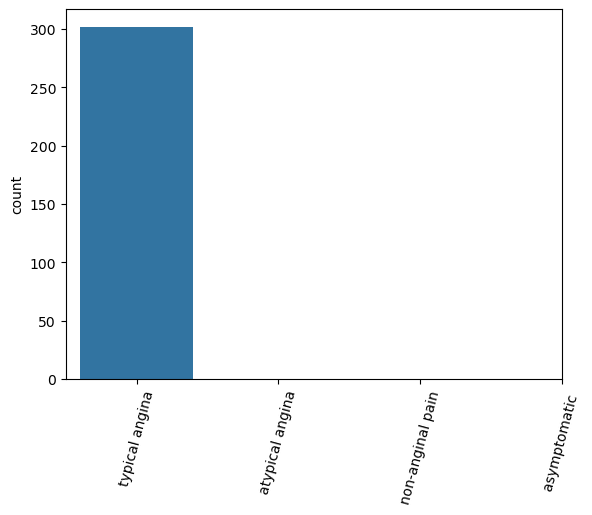

In [20]:
sns.countplot(df["cp"])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic "])
plt.xticks(rotation=75)
plt.show()

### Show The Chest Pain Distribution As Per Target Variable:

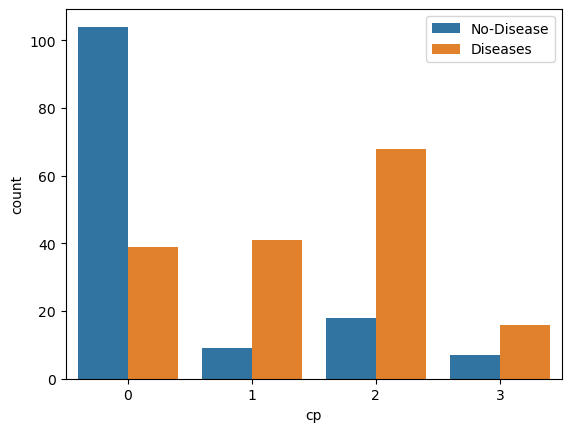

In [21]:
sns.countplot(x='cp',hue='target',data=df)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

### Show Fasting Blood Sugar Distribution According To Target Variable:


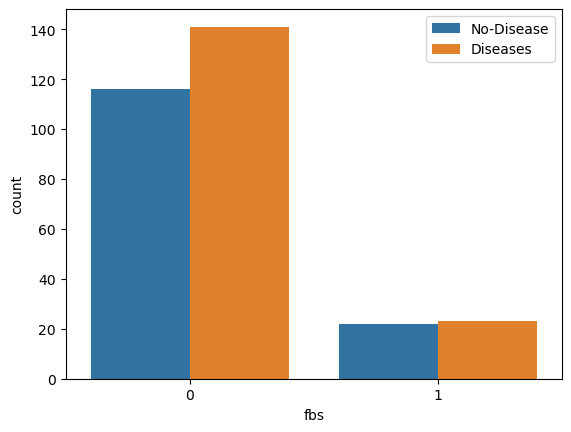

In [22]:
sns.countplot(x='fbs',hue='target',data=df)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

## Data Processing :
### Categorical and numerical Columns:

In [23]:
categorical=[]
numerical=[]
for column in df.columns:
    if df[column].nunique()<10:
        categorical.append(column)
    else:
        numerical.append(column)


In [24]:
print(categorical)
print(numerical) 

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [25]:
categorical.remove("sex")
categorical.remove("target")

### Dummy values :

In [26]:
df=pd.get_dummies(df,columns=categorical,drop_first=True)

In [27]:
df.shape

(302, 23)

### Feature Scaling:

In [28]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [29]:
st=StandardScaler()


In [30]:
df[numerical]=st.fit_transform(df[numerical])

In [31]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Splitting the Dataset into the training set and test set:

In [32]:
X=df.drop("target",axis=1)
y=df["target"]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression:

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LR=LogisticRegression()

In [36]:
LR.fit(X_train,y_train)

LogisticRegression()

In [37]:
prediction_1=LR.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,prediction_1)

0.7868852459016393

### Support Vector Classification:

In [40]:
from sklearn import svm

In [41]:
svm=svm.SVC()

In [42]:
svm.fit(X_train,y_train)

SVC()

In [43]:
prediction_2=svm.predict(X_test)

In [44]:
accuracy_score(y_test,prediction_2)

0.8032786885245902

### Save Model using Joblib:

In [45]:
joblib.dump(svm,'Knn_Model')

['Knn_Model']

In [46]:
model = joblib.load('Knn_Model')

In [47]:
model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)